In [155]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
import numpy as np 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [156]:
def mape (obs, forc) :
    sum_total = 0
    for i in range(len(obs)):
        temp = abs((obs[i]-forc[i])/obs[i])
        sum_total = sum_total + temp
    mape_value = sum_total / len(obs)
    return mape_value

In [157]:
df.Date

0     2019-01-02
1     2019-01-03
2     2019-01-04
3     2019-01-07
4     2019-01-08
         ...    
240   2019-12-20
241   2019-12-23
242   2019-12-26
243   2019-12-27
244   2019-12-30
Name: Date, Length: 245, dtype: datetime64[ns]

In [158]:
df = pd.read_csv(r'..\..\Data\2. BBCA.JK.csv')
df['Date'] = pd.to_datetime(df.Date)
df = df[df.Volume != 0].reset_index(drop=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,26000,26225,26000,26200,25440.95898,7191200
1,2019-01-03,26000,26100,25575,25900,25149.65234,14471600
2,2019-01-04,25875,26025,25625,26025,25271.03125,10293000
3,2019-01-07,26325,26625,26225,26225,25465.23633,14687600
4,2019-01-08,26150,26600,26025,26200,25440.95898,13249500


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       245 non-null    datetime64[ns]
 1   Open       245 non-null    int64         
 2   High       245 non-null    int64         
 3   Low        245 non-null    int64         
 4   Close      245 non-null    int64         
 5   Adj Close  245 non-null    float64       
 6   Volume     245 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 13.5 KB


In [160]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02
mean,29388.979592,29582.448980,29170.000000,29389.897959,28731.272441,1.278550e+07
std,1804.221762,1795.021897,1816.705269,1816.260934,1876.578122,6.120188e+06
min,25875.000000,26025.000000,25575.000000,25900.000000,25149.652340,3.544400e+06
25%,27700.000000,27800.000000,27450.000000,27600.000000,26824.675780,8.558200e+06
50%,29750.000000,30000.000000,29525.000000,29925.000000,29323.673830,1.165910e+07
75%,30950.000000,31050.000000,30725.000000,30875.000000,30254.583980,1.545780e+07
max,33500.000000,34000.000000,33350.000000,33775.000000,33201.046880,4.198460e+07


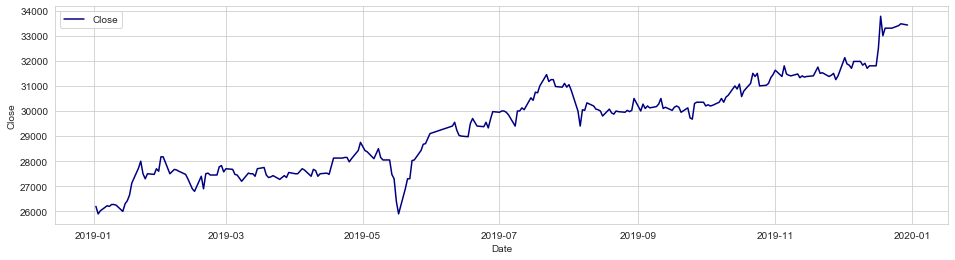

In [161]:
fig,ax = plt.subplots(figsize = (16,4))
sns.lineplot(data = df, x = 'Date',y = 'Close', ax = ax, color = 'Navy', linestyle='-', label='Close')
plt.legend()
plt.show()

c:\users\microsoft user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


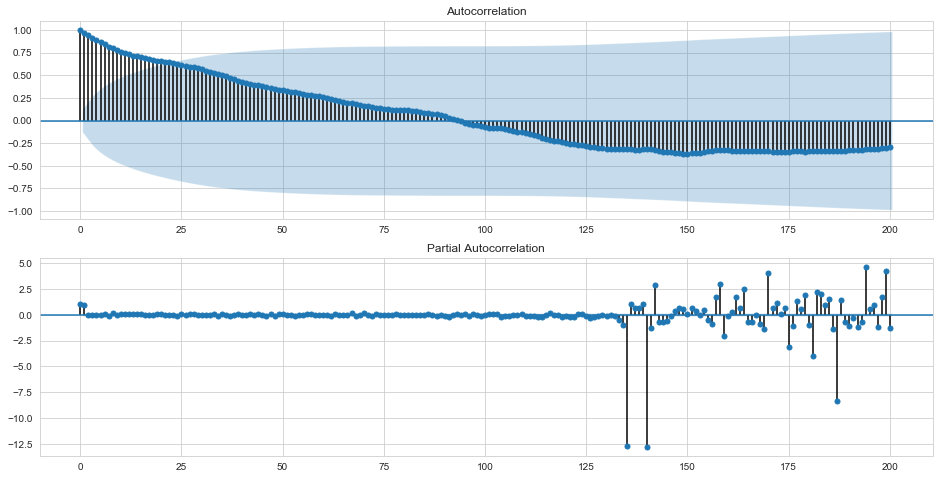

In [162]:
fig,ax = plt.subplots(2,1,figsize = (16,8))
plot_acf(df.Close, lags = 200, ax=ax[0])
plot_pacf(df.Close, lags = 200, ax=ax[1])
plt.show()

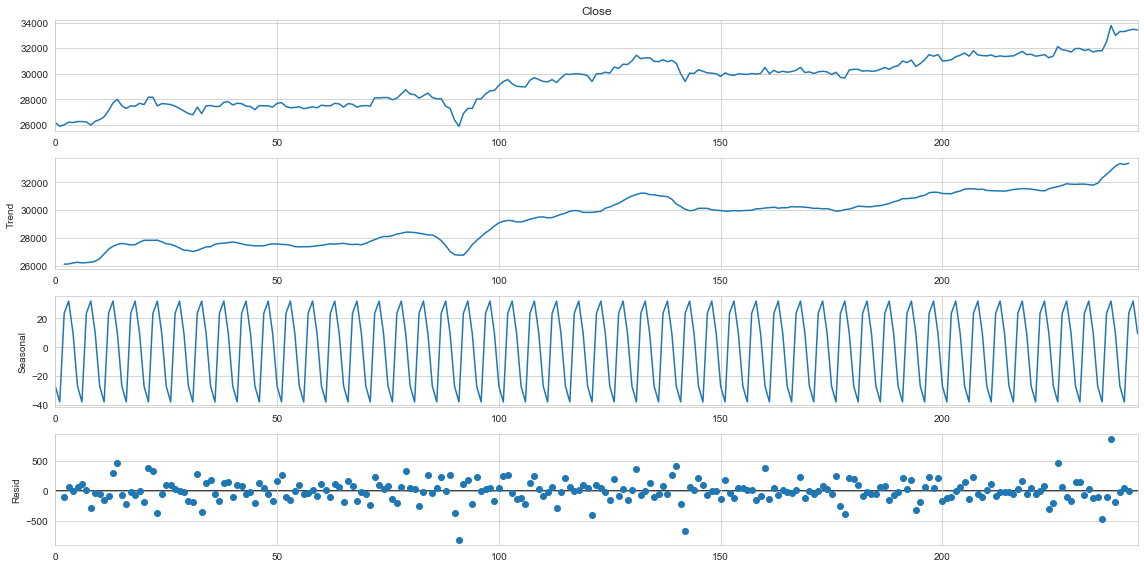

In [163]:
plt.rc("figure", figsize=(16,8))
seasonal_decompose_result = seasonal_decompose(df.Close, model='additive', period=5)
fig = seasonal_decompose_result.plot()
plt.show()

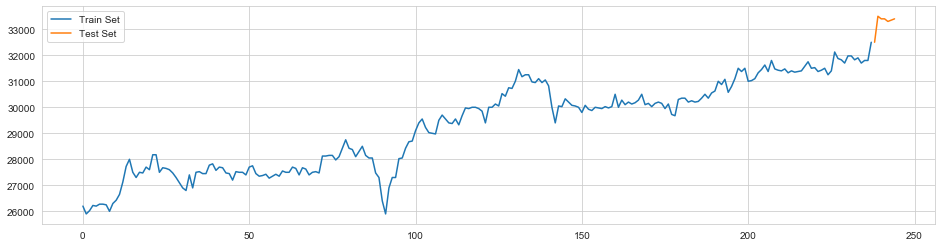

In [164]:
train = df.Close.iloc[:-7]
test = df.Open.iloc[-7:]
plt.figure(figsize = (16,4))
plt.plot(train, label = 'Train Set')
plt.plot(test, label = 'Test Set')
plt.legend()

In [ ]:
arima_model = auto_arima(train,start_p = 0, d=1, start_q = 0, max_p = 5, max_d = 5, max_q = 5,
                         start_P = 0, D=1, start_Q = 0, max_P = 5, max_D = 5, max_Q = 5, m=7, seasonal = True, error_action = 'warn',
                         trace = True, surpress_warnings = True, stepwise = True, random_state = 20, n_fits = 50)

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 7) (constant=True); AIC=3409.565, BIC=3416.442, Time=0.052 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 7) (constant=True); AIC=3334.005, BIC=3347.757, Time=0.829 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 7) (constant=True); AIC=3292.593, BIC=3306.345, Time=1.940 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 7) (constant=False); AIC=3407.572, BIC=3411.010, Time=0.027 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 0, 7) (constant=True); AIC=3406.324, BIC=3416.638, Time=0.107 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 1, 7) (constant=True); AIC=3294.388, BIC=3311.578, Time=2.340 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 2, 7) (constant=True); AIC=3294.391, BIC=3311.581, Time=3.242 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 0, 7) (constant=True); AIC=3334.066, BIC=3347.819, Time=0.825 seconds
Fit ARIMA: (0, 1, 1)x(1, 1, 2, 7) (constant=True); AIC=3296.637, BIC=3317.266, Time=4.162 seconds
Near non-invertible roots for order (0, 1, 1)(1, 1, 2, 7); setting score t

c:\users\microsoft user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: (1, 1, 1)x(0, 1, 1, 7) (constant=True); AIC=3294.593, BIC=3311.783, Time=3.206 seconds
Fit ARIMA: (0, 1, 2)x(0, 1, 1, 7) (constant=True); AIC=3294.570, BIC=3311.761, Time=2.075 seconds


In [166]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  238
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -1642.287
Date:                             Mon, 01 Feb 2021   AIC                           3292.574
Time:                                     12:56:54   BIC                           3306.326
Sample:                                          0   HQIC                          3298.122
                                             - 238                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7645      4.012     -0.440      0.660      -9.628       6.099
ar.L1         -0.0858      0.042     -2.059      0.039      -0.167      -0.004
ma.S.L7       -0.8035      0.041    -19.653      0.000      -0.884      -0.723
sigma2      7.601e+04   4865.962     15.622      0.000    6.65e+04    8.56e+04
===================================================================================
Ljung-Box (Q):                       41.70   Jarque-Bera (JB):                15.10
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.07
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
prediction = arima_model.predict(n_periods = len(test))

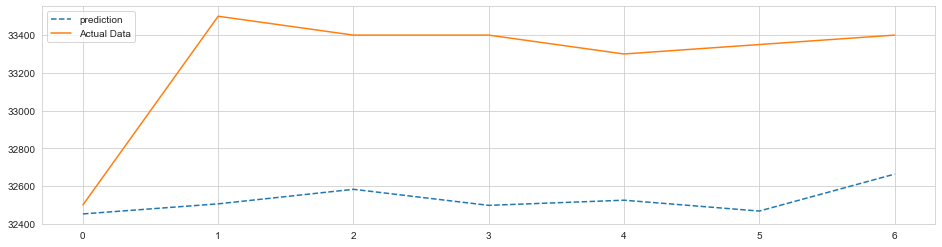

In [168]:
plt.figure(figsize = (16,4))
plt.plot(prediction, label = 'prediction', linestyle = '--')
plt.plot(test.reset_index(drop=True), label = 'Actual Data')
plt.legend()

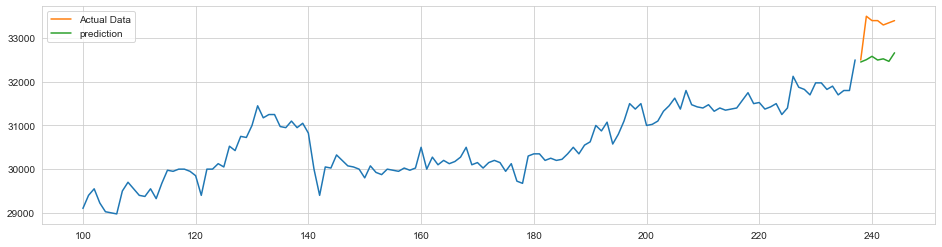

In [169]:
plt.figure(figsize = (16,4))
plt.plot(train.iloc[100:])
plt.plot(test, label = 'Actual Data')
plt.plot(pd.DataFrame(prediction, index = test.index), label = 'prediction')
plt.legend()

In [172]:
print("MAPE Value of prediction and actual data is {}".format(mape(prediction,test.values)))

MAPE Value of prediction and actual data is 0.022639095203336283
